In [1]:
%matplotlib inline

In [2]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as pl

/usr/local/astro64/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/zmq/__init__.py:37: RuntimeWarning: libzmq 4 detected.
        It is unlikely that IPython's zmq code will work properly.
        Please install libzmq stable, which is 2.1.x or 2.2.x
  RuntimeWarning)


In [3]:
hdu = fits.open('../data/forwcs_drc_sci.fits')

In [4]:
imagedata = hdu[0].data.copy()

In [5]:
coords = np.genfromtxt('../data/hst_coords.dat').transpose()
coords -= 1.0

In [6]:
coords[2], coords[3]

(array([  974.665,  1462.135,  2459.64 ,  4430.166,  3401.273,   993.797,
         1819.908,  3359.234,  4170.773]),
 array([ 3983.783,  3203.041,  3583.388,  3645.583,  2147.794,  1798.993,
         1206.87 ,  1265.37 ,  1535.732]))

In [10]:
import fitstars
import integrate
reload(integrate)
reload(fitstars)

<module 'fitstars' from 'fitstars.py'>

In [11]:
%prun results = fitstars.fitstars(imagedata, coords[2][:2], coords[3][:2], 15, subnx=21, subny=21, minimize_type='curvefit', psftype='gaussmix', ngauss=5)

[  0.00000000e+00   0.00000000e+00   5.00000000e+00   2.00000000e-01
   0.00000000e+00   0.00000000e+00   2.50000000e+00   2.00000000e-01
   0.00000000e+00   0.00000000e+00   1.25000000e+00   2.00000000e-01
   0.00000000e+00   0.00000000e+00   6.25000000e-01   2.00000000e-01
   0.00000000e+00   0.00000000e+00   3.12500000e-01   2.00000000e-01
   0.00000000e+00   0.00000000e+00   4.57721611e+05   1.41361237e+02
   0.00000000e+00   0.00000000e+00   2.13048732e+06   1.41361237e+02]


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 5800.

In [17]:
import psf
%time psf.moffat_kernel(0.1, 0.1, 2.5, 2.0, q = 0.9, posang=75)

CPU times: user 1.97 ms, sys: 1.39 ms, total: 3.36 ms
Wall time: 1.97 ms


array([[ 0.00027715,  0.00036271,  0.00046476,  0.00057496,  0.000676  ,
         0.00074412,  0.00075907,  0.00071592,  0.00062836,  0.00051998,
         0.00041217,  0.00031774,  0.00024123],
       [ 0.00038586,  0.0005342 ,  0.00072794,  0.00095845,  0.00119095,
         0.00136247,  0.0014085 ,  0.00130909,  0.00110575,  0.00086768,
         0.00064857,  0.00047205,  0.00034007],
       [ 0.00052903,  0.0007822 ,  0.00115113,  0.00164815,  0.00221889,
         0.00269478,  0.00284919,  0.00259198,  0.0020682 ,  0.00150489,
         0.00103994,  0.00070419,  0.00047673],
       [ 0.00070085,  0.00111307,  0.00179314,  0.00286015,  0.0043159 ,
         0.00575547,  0.00632726,  0.00557639,  0.00408463,  0.00267227,
         0.00166773,  0.00103566,  0.000654  ],
       [ 0.00087551,  0.00148862,  0.00263381,  0.00475735,  0.0083301 ,
         0.01275961,  0.01498306,  0.01263296,  0.00818785,  0.00465911,
         0.00257704,  0.00145736,  0.00085815],
       [ 0.00100513,  0.001797

In [1]:
reload(fitstars)
%time p0, d, sig = fitstars.fitstars(imagedata, coords[2][:2], coords[3][:2], 5, subnx=35, subny=35)

NameError: name 'fitstars' is not defined

In [24]:
%timeit fitstars.star_chi2(p0, d, sig)
%prun fitstars.star_chi2(p0, d, sig)

10 loops, best of 3: 68.7 ms per loop
 

In [21]:
#print(results)
print("PSF parameters: " +str(results[0:4]))
print("X0s: " + str(results[4::4]))
print("Y0s: " + str(results[5::4]))
print("fluxes: " + str(results[6::4]))
print("sky: " + str(results[7::4]))

PSF parameters: [  2.00549633   2.55932831   1.01066023 -12.63198291]
X0s: [-0.33237643  0.14957814]
Y0s: [-0.27258703  0.026345  ]
fluxes: [  544523.49091833  2519097.71783298]
sky: [ 172.92300794  308.33195207]


In [35]:
reload(fitstars)
modeller = fitstars.star_modeller(21, 21, 2, psftype='gaussmix')
dmodel = modeller.model_stars(results)
d = fitstars.make_substamps(imagedata, coords[2][:2], coords[3][:2], 21, 21)

<matplotlib.colorbar.Colorbar instance at 0x125f09f38>

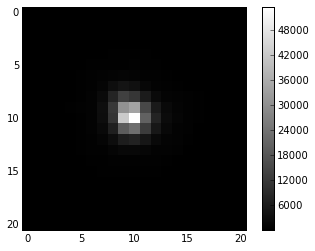

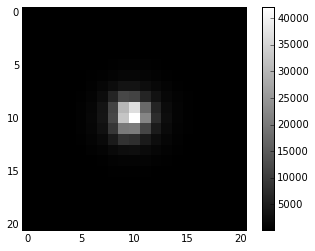

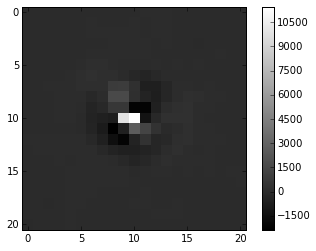

In [36]:
pl.imshow(d[0],cmap = 'gray', interpolation='nearest'); pl.colorbar()
pl.figure()
pl.imshow(dmodel[0],cmap = 'gray', interpolation='nearest'); pl.colorbar()
pl.figure()
pl.imshow(d[0] - dmodel[0], cmap = 'gray', interpolation='nearest'); pl.colorbar()


<matplotlib.colorbar.Colorbar instance at 0x120321950>

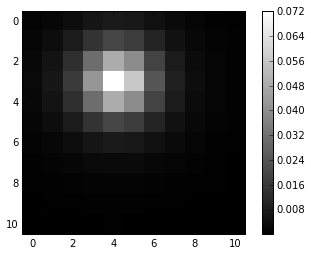

In [93]:
pl.imshow(psf.moffat_kernel(-0.8, -2.0, 2, 2), cmap = 'gray', interpolation='nearest'); pl.colorbar()

In [138]:
reload(fitstars)
%prun curve_results = fitstars.curvefitstars(imagedata, [coords[2][6]], [coords[3][6]], 15, subnx=21, subny=21)

In [34]:
reload(fitstars)
dmodel = fitstars.model_stars(curve_results[0], 21, 21)
d = fitstars.make_substamps(imagedata, coords[2], coords[3], 21, 21)

AttributeError: 'module' object has no attribute 'model_stars'

[[10 10]]
[[10 10]]


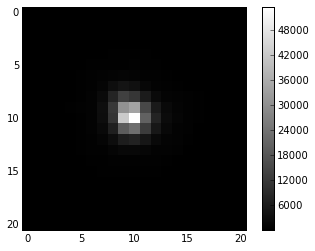

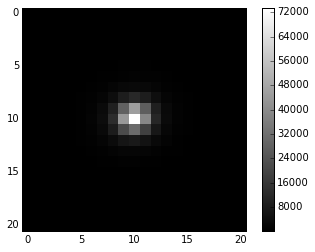

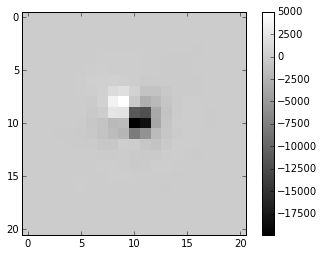

In [140]:
pl.imshow(d[0],cmap = 'gray', interpolation='nearest'); pl.colorbar()
pl.figure()
pl.imshow(dmodel[0],cmap = 'gray', interpolation='nearest'); pl.colorbar()
pl.figure()
pl.imshow(d[0] - dmodel[0], cmap = 'gray', interpolation='nearest'); pl.colorbar()
print(np.argwhere(dmodel[0] == dmodel[0].max()))
print(np.argwhere(d[0] == d[0].max()))

In [134]:
curve_results[0]

array([  2.17285214e+00,   2.56539052e+00,   9.54314266e-01,
         1.72127566e+01,  -2.94151047e-01,  -2.36150435e-01,
         4.57344049e+05,   1.62230863e+02,   1.82683082e-01,
         8.03035578e-02,   2.11576282e+06,   2.76797925e+02,
        -3.17156924e-01,   3.75125097e-01,   2.21068077e+05,
         9.23326150e+02,   1.78289106e-01,  -4.89082231e-01,
         2.83633201e+05,   1.58587016e+02,   3.28382673e-01,
        -2.38808363e-01,   9.88725205e+04,   1.45549337e+02,
        -1.87498199e-01,  -3.07041257e-03,   8.16632917e+04,
         1.45360908e+02,  -3.64771006e-02,  -1.65640024e-01,
         5.42739895e+05,   1.60795620e+02,   2.92108907e-01,
         3.80192771e-01,   2.89410057e+05,   1.52635429e+02,
        -1.89863898e-01,  -1.92632609e-01,   2.97198683e+06,
         4.52841909e+02])

In [137]:
coords[3]

array([ 3984.783,  3204.041,  3584.388,  3646.583,  2148.794,  1799.993,
        1207.87 ,  1266.37 ,  1536.732])

In [141]:
#print(results)
print("PSF parameters: " +str(curve_results[0][0:4]))
print("X0s: " + str(curve_results[0][4::4]))
print("Y0s: " + str(curve_results[0][5::4]))
print("fluxes: " + str(curve_results[0][6::4]))
print("sky: " + str(curve_results[0][7::4]))

PSF parameters: [  1.72217695   2.34605543   0.89468753 -79.76023174]
X0s: [-0.05332514]
Y0s: [-0.15679056]
fluxes: [ 594847.04834517]
sky: [ 186.93486034]


In [37]:
results

array([  5.00945739e+03,  -4.18630175e+03,   2.02556769e+00,
         2.00000000e-01,   5.01028706e+03,  -4.18639257e+03,
         8.10667625e-01,   2.00000000e-01,   5.00896004e+03,
        -4.18542219e+03,   8.56733566e-01,   2.00000000e-01,
         5.00938344e+03,  -4.18663640e+03,   5.20615360e-01,
         2.00000000e-01,   5.00882255e+03,  -4.18707596e+03,
         8.29865671e-01,   2.00000000e-01,  -5.00970876e+03,
         4.18608568e+03,   4.19584542e+04,   1.97483643e+02,
        -5.00923154e+03,   4.18638221e+03,   1.98068554e+05,
         4.10032712e+02])

In [38]:
fitstars.fitstars(imagedata, coords[2][:2], coords[3][:2], 15, subnx=21, subny=21, minimize_type='curvefit', psftype='gaussmix', ngauss=5)

[  0.00000000e+00   0.00000000e+00   5.00000000e+00   2.00000000e-01
   0.00000000e+00   0.00000000e+00   2.50000000e+00   2.00000000e-01
   0.00000000e+00   0.00000000e+00   1.25000000e+00   2.00000000e-01
   0.00000000e+00   0.00000000e+00   6.25000000e-01   2.00000000e-01
   0.00000000e+00   0.00000000e+00   3.12500000e-01   2.00000000e-01
   0.00000000e+00   0.00000000e+00   4.57721611e+05   1.41361237e+02
   0.00000000e+00   0.00000000e+00   2.13048732e+06   1.41361237e+02]


array([  5.00945739e+03,  -4.18630175e+03,   2.02556769e+00,
         2.00000000e-01,   5.01028706e+03,  -4.18639257e+03,
         8.10667625e-01,   2.00000000e-01,   5.00896004e+03,
        -4.18542219e+03,   8.56733566e-01,   2.00000000e-01,
         5.00938344e+03,  -4.18663640e+03,   5.20615360e-01,
         2.00000000e-01,   5.00882255e+03,  -4.18707596e+03,
         8.29865671e-01,   2.00000000e-01,  -5.00970876e+03,
         4.18608568e+03,   4.19584542e+04,   1.97483643e+02,
        -5.00923154e+03,   4.18638221e+03,   1.98068554e+05,
         4.10032712e+02])